<div style="text-align: left; background-color:#bcebf7; font-family:Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 32px">PROJECT: ANALYSE AND CLASSIFY THE AUTHENTICITY OF ONLINE NEWS IN BIG DATA CONTEXT</div>
<div style="text-align: left; background-color:#ee9ef7; font-family: Arial; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px"> EXPLORATORY DATA ANALYSIS: GETTING INSIGHTS FROM DATA</div>

### 1. Import library

In [1]:
import pandas as pd
import numpy as np
import statistics
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Visualize.make_dataframe import make_dataframe
from Visualize.retrieve_topic import retrieve_topic
from Visualize.visualize_frequency_words import visualize_frequency_words

### 2. Get data from Mongodb and convert to dataframe

In [2]:
df = pd.DataFrame()
df = make_dataframe()
df.head(2)

,title,content,url,label,imageURL,domain,topic,date
0,Bức vẽ giúp bạn đánh giá mức độ stress của bản...,"[tranh, vòng_tròn, chuyển_động, chậm_rãi, hình...",https://suckhoe.vnexpress.net/tin-tuc/tu-van/b...,1,https://i-suckhoe.vnecdn.net/2018/11/16/onh-15...,suckhoe.vnexpress.net,None,2018-11-17 12:15:00
1,KHẨN CẤP: Hàng loạt trẻ em nhập viện vì ngộ độ...,"[xét_nghiệm, ban_đầu, trẻ, nhập_viện, bé, dấu_...",http://phapluat.news/khan-cap-hang-loat-tre-em...,1,http://img-static.phapluat.news/2017/10/H1.jpg,phapluat.news,None,2017-10-04 14:29:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6022 non-null   object
 1   content   6022 non-null   object
 2   url       6022 non-null   object
 3   label     6022 non-null   int64 
 4   imageURL  6022 non-null   object
 5   domain    6022 non-null   object
 6   topic     5780 non-null   object
 7   date      6009 non-null   object
dtypes: int64(1), object(7)
memory usage: 376.5+ KB


### 3. Get brief information

3.1 Data shape and features

In [4]:
print("Data shape:",df.shape)
print("Data features:", df.columns.tolist())

Data shape: (6022, 8)
Data features: ['title', 'content', 'url', 'label', 'imageURL', 'domain', 'topic', 'date']


3.2 Distribution of classes

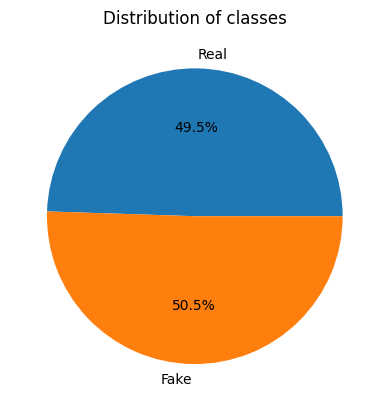

In [14]:
count = [df['label'].value_counts()[0], df['label'].value_counts()[1]]
labels = ['Real', 'Fake']
plt.pie(count, labels = labels, autopct='%1.1f%%');
plt.title('Distribution of classes');

3.3 Distribution of topics

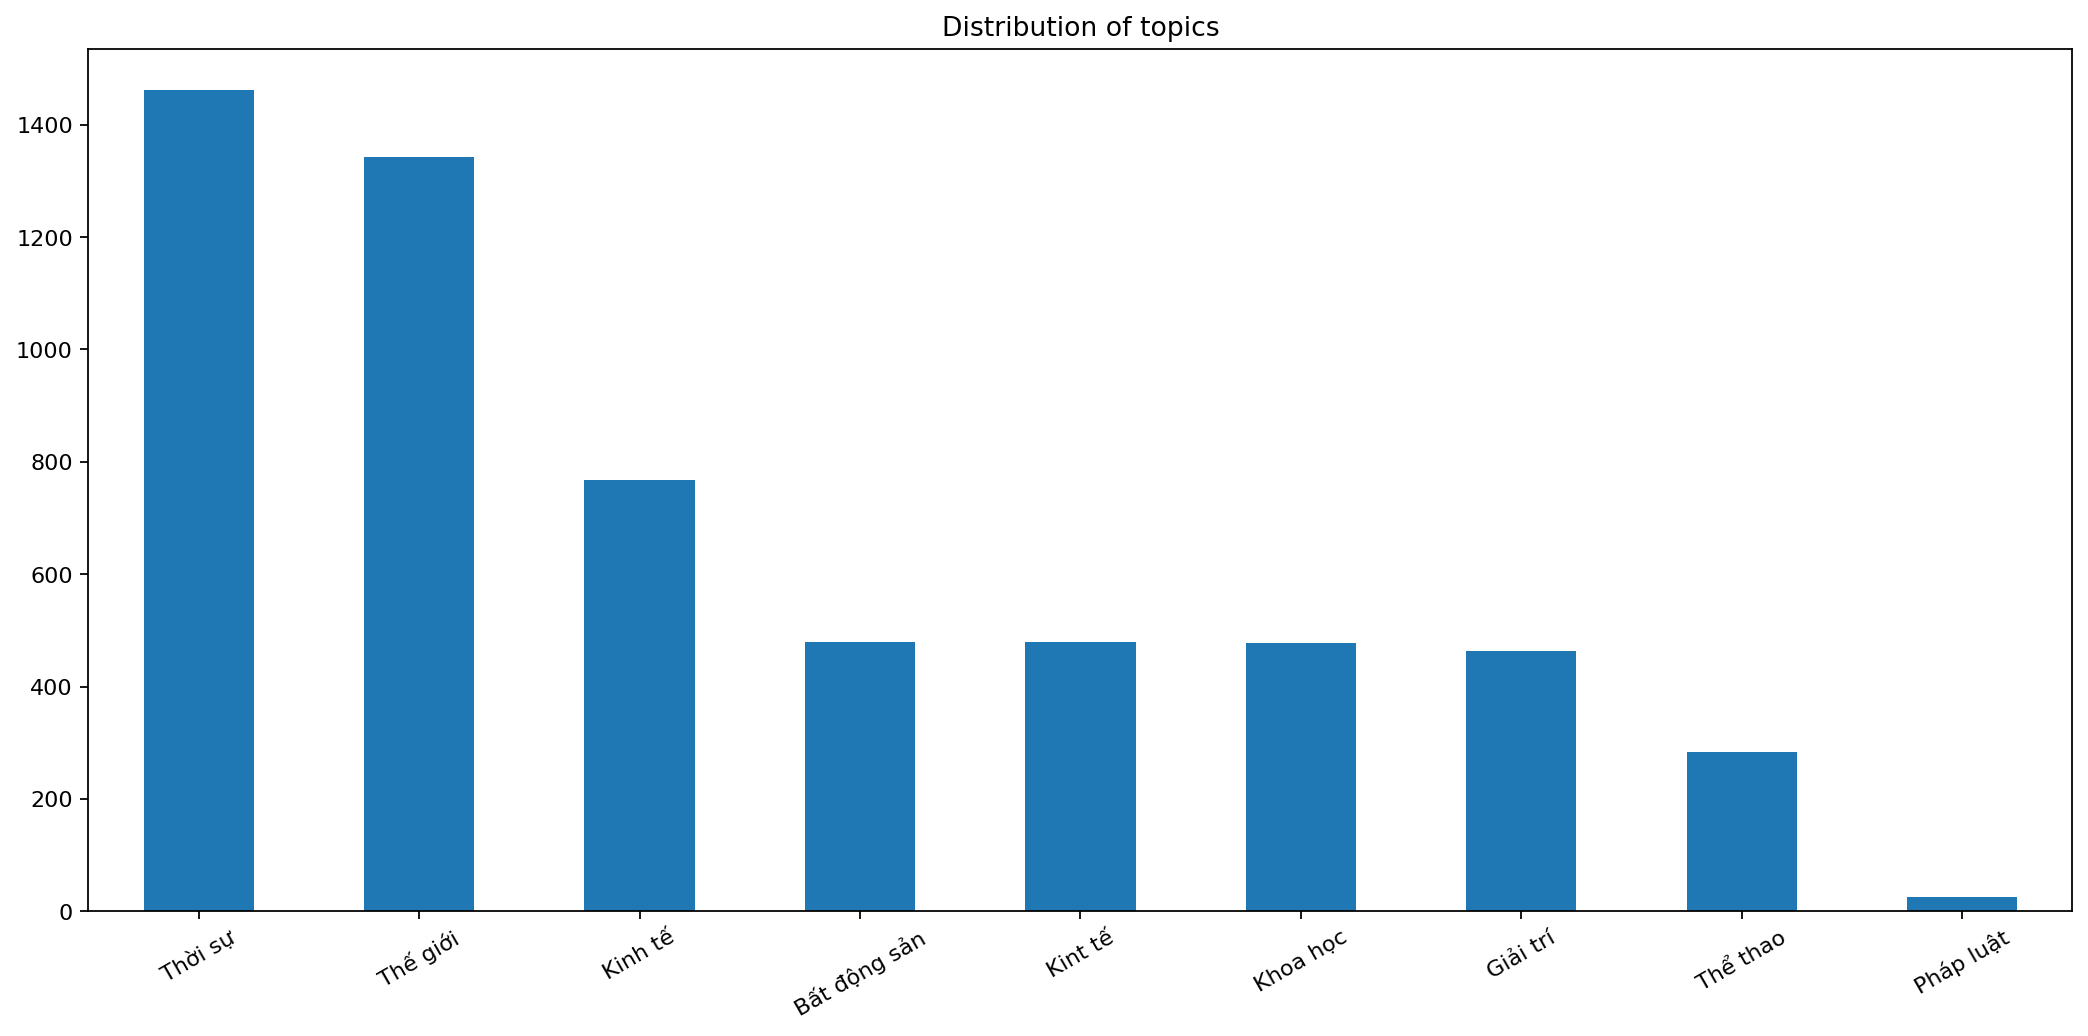

In [19]:
plt.figure(figsize = (16,7), dpi = 160)
df['topic'].value_counts().plot(kind = 'bar');
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.title('Distribution of topics');

### 4. Text analysis

4.1 Statistical information of text length

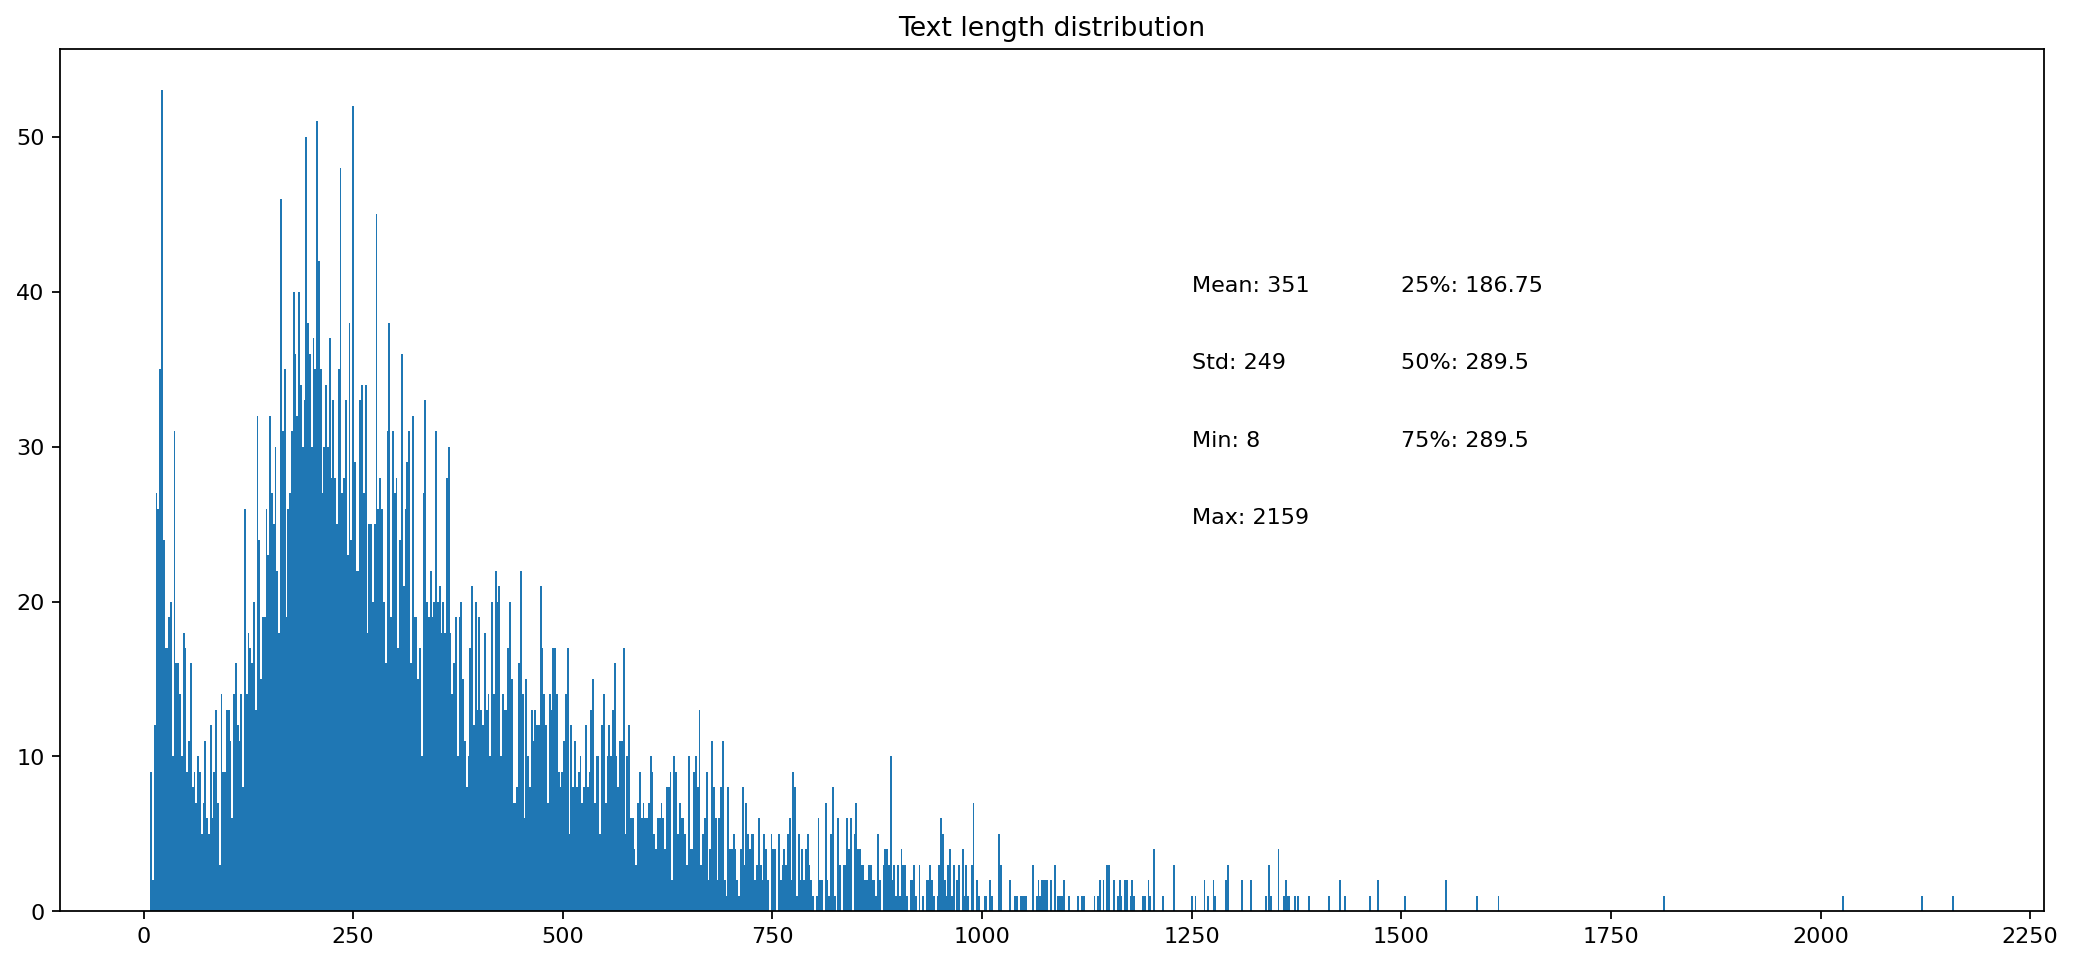

In [46]:
#doc_lens = [get_len(d) for d in df.content]
doc_lens = [len(d) for d in df.content]
plt.figure(figsize=(16,7), dpi=160)
plt.locator_params(axis='x', nbins = 10)
plt.text(1250, 40, f'Mean: {round(statistics.mean(doc_lens))}')
plt.text(1250, 35, f'Std: {round(statistics.stdev(doc_lens))}')
plt.text(1500, 40, f'25%: {(statistics.quantiles(doc_lens)[0])}')
plt.text(1500, 35, f'50%: {(statistics.quantiles(doc_lens)[1])}')
plt.text(1500, 30, f'75%: {(statistics.quantiles(doc_lens)[1])}')
plt.hist(doc_lens, bins = 1000);
plt.title("Text length distribution");

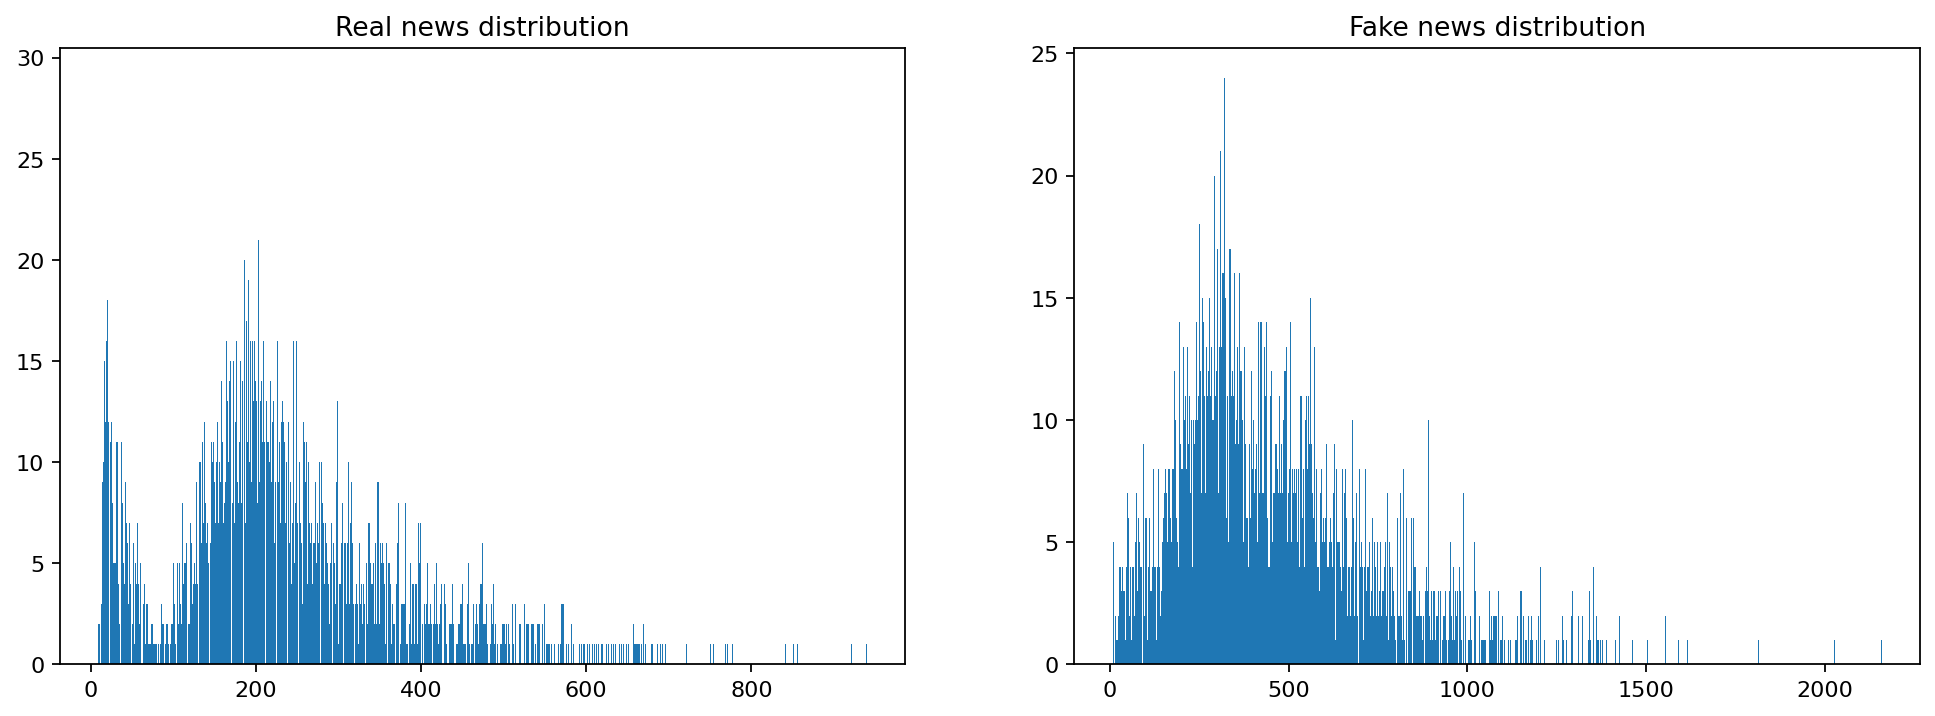

In [13]:
fake_df = df[df['label'] == 1]
real_df = df[df['label'] == 0]
fake_doc_lens = [len(d) for d in fake_df.content]
real_doc_lens = [len(d) for d in real_df.content]

fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=160)
axes[0].hist(real_doc_lens, bins = 1000);
axes[0].set_title("Real news distribution");

axes[1].hist(fake_doc_lens, bins = 1000);
axes[1].set_title("Fake news distribution");

4.2

4.3 

4.4 

4.5

### 5. Use topic extraction to find out news trends according to each topic in the collected dataset

5.1 Topic extraction for each news

In [8]:
df['topic_extract'] = pd.Series()
for i in range(df.shape[0]):
    df['topic_extract'][i] = retrieve_topic(df['content'][i])

In [9]:
pd.set_option('display.max_colwidth', None)
df['topic_extract']

0       [hình_ảnh, chuyển_động, alic, ảnh, tiến_sĩ, thần_kinh, hiệu_ứng, nhận_thức, proverbio, thị_giác]
1                              [thuốc, heo, tiêm, an_thần, bé, nhập_viện, trẻ, trường, ban_đầu, cấp_cứu]
2                               [chó, chi_cục, cầm_viên, thảo, hoang, đem, thú, tiêu_hủi, sư_tử, cán_bộ]
3                                       [chó, bắt, chi_cục, thú_i, đội, tp, hcm, săn_bắt, rông, công_an]
4                     [xăng, dầu, doanh_nghiệp, hiệp_hội, việt_nam, iq8, trạm, nước_ngoài, hàng, hà_nội]
                                                      ...                                               
6017                                   [đá, cầu, pháp, nam, hình_ảnh, đi, việt, việt_nam, trang, nguyễn]
6018                         [thuyền_buồm, clipper, đua, race, vịnh, hạ_long, việt, đoàn, nam, thủy_thủ]
6019                 [đi, 10000, nghiên_cứu, con_số, mục_tiêu, hình_ảnh, đếm, sức_khỏe, phụ_nữ, lợi_ích]
6020                     [đội, bóng, chelsea, trận, hìn

5.2 With each type of real or fake topic, visualize their news trends

In [12]:
# general_topic = list(df.topic.unique())
# general_topic.remove(None)
# plt.rcParams['figure.figsize'] = [12, 7]
# grouped_df = df.groupby(['topic'])
# for t in general_topic:
#     tmp = grouped_df.get_group(t)
#     tmp_official = tmp[tmp['label'] == 0]
#     tmp_unofficial = tmp[tmp['label'] == 1]
#     plt.subplot(1, 2, 1)
#     visualize_frequency_words(tmp_official, 'topic_extract', f'News trend on official {t}')
#     plt.subplot(1, 2, 2)
#     visualize_frequency_words(tmp_unofficial, 'topic_extract', f'News trend on unoffical {t}')
#     plt.show()